# Цель проекта


Предсказать коэффициент восстановления золота из золотосодержащей руды.

# Описание данных


**Rougher feed** — исходное сырье

**Rougher additions (или reagent additions)** — флотационные реагенты: Xanthate, Sulphate, Depressant

**Xanthate** — ксантогенат (промотер, или активатор флотации);

**Sulphate** — сульфат (на данном производстве сульфид натрия);

**Depressant** — депрессант (силикат натрия).

**Rougher process** (англ. «грубый процесс») — флотация

**Rougher tails** — отвальные хвосты

**Float banks** — флотационная установка

**Cleaner process** — очистка

**Rougher Au** — черновой концентрат золота

**Final Au** — финальный концентрат золота

Параметры этапов

**air amount** — объём воздуха

**fluid levels** — уровень жидкости

**feed size** — размер гранул сырья

**feed rate** — скорость подачи

## Подготовка данных

### Содержание таблиц

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.random import RandomState

from sklearn import tree
from sklearn import linear_model
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer

In [ ]:
# данные
try:
    df_train = pd.read_csv('/content/gold_recovery_full_new.csv')
    df_test =  pd.read_csv('/content/gold_recovery_test_new.csv')
    df_full = pd.read_csv('/content/gold_recovery_full_new.csv')
except:
    df_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
    df_test =  pd.read_csv('/datasets/gold_recovery_test_new.csv')
    df_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')

In [ ]:
df_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [ ]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


В данных есть пропуски, причём в тестовой выборке меньше признаков, чем в обучающей. Можно предположить, что не все признаки в исходной таблице влияют на целевой признак, поэтому в тестовой выборке 54 из 88 (а может и не так).
Все признаки (кроме даты) - числовые.
Пропуски могут быть так как эти ячейки заполняются позже.

### Проверка правильности расчёта эффективности обогащения

In [ ]:
# чтобы при расчётах не было ошибок, удалим из обучающей выборки пропуски

df_train = df_train.dropna()

In [ ]:
# будем считать эффективность по процессу флотации
# Для расчёта эффективности (rougher.output.recovery) понадобятся следующие величины:

# C — доля золота в концентрате после флотации/очистки: rougher.output.concentrate_au
# F — доля золота в сырье/концентрате до флотации/очистки: rougher.input.feed_au
# T — доля золота в отвальных хвостах после флотации/очистки: rougher.output.tail_au


rougher_output_recovery = df_train['rougher.output.recovery']

rougher_output_concentrate_au = df_train['rougher.output.concentrate_au']
rougher_input_feed_au = df_train['rougher.input.feed_au']
rougher_output_tail_au = df_train['rougher.output.tail_au']

In [ ]:
# посчитаю эффективность обогащения

calc_rougher_output_recovery=(rougher_output_concentrate_au*(rougher_input_feed_au - rougher_output_tail_au))/(rougher_input_feed_au*(rougher_output_concentrate_au - rougher_output_tail_au))*100

In [ ]:
# сравню табличный и рассчитанный результат

difference_table = pd.DataFrame(
    {'Рассчитанная recovery': calc_rougher_output_recovery,
    'Табличная recovery': rougher_output_recovery}
)

In [ ]:
difference_table.head(10)

,Рассчитанная recovery,Табличная recovery
0,87.107763,87.107763
1,86.843261,86.843261
2,86.842308,86.842308
3,87.226430,87.226430
4,86.688794,86.688794
5,88.156912,88.156912
6,88.168065,88.168065
7,87.668336,87.668336
8,87.035862,87.035862
9,87.650868,87.650868


In [ ]:
difference_table.tail(10)

,Рассчитанная recovery,Табличная recovery
14134,90.577495,90.577495
14140,89.946627,89.946627
14141,87.684717,87.684717
14142,90.677361,90.677361
14143,91.816623,91.816623
14144,89.574376,89.574376
14145,87.724007,87.724007
14146,88.890579,88.890579
14147,89.858126,89.858126
14148,89.514960,89.514960


In [ ]:
calc_rougher_output_recovery.max()

100.0

In [ ]:
rougher_output_recovery.max()

100.0

In [ ]:
calc_rougher_output_recovery.min()

-0.0

In [ ]:
rougher_output_recovery.min()

0.0

In [ ]:
# посчитаю MAE между расчётами и значением признака

mean_absolute_error(calc_rougher_output_recovery, rougher_output_recovery)

9.82970122149377e-15

Проверка проведена. Эффективность обогащения рассчитана правильно. Нет значений меньше 0 и больше 100, что верно. Эффективность не может быть отрицательным числом и не может быть больше 100. MAE между табличными и расчётными значениями очень мала (9.8 * 10^-15), что ещё раз подтверждает правильность расчётов.

### Признаки, недоступные в тестовой выборке

In [ ]:
# разница между признаками в full и test

dif_col = pd.Series(list(set(df_full.columns) - set(df_test.columns)))
display(dif_col.sort_values())
print(f'В тестовой выборке отсутствуют {dif_col.count()} признака')

16                          final.output.concentrate_ag
6                           final.output.concentrate_au
7                           final.output.concentrate_pb
17                         final.output.concentrate_sol
3                                 final.output.recovery
2                                  final.output.tail_ag
19                                 final.output.tail_au
9                                  final.output.tail_pb
24                                final.output.tail_sol
20                primary_cleaner.output.concentrate_ag
30                primary_cleaner.output.concentrate_au
13                primary_cleaner.output.concentrate_pb
23               primary_cleaner.output.concentrate_sol
26                       primary_cleaner.output.tail_ag
14                       primary_cleaner.output.tail_au
11                       primary_cleaner.output.tail_pb
15                      primary_cleaner.output.tail_sol
21                      rougher.calculation.au_p

В тестовой выборке отсутствуют 34 признака


Бросается в глаза, что все эти признаки из категории "output", то есть выходные значения после кажого технологического процесса. Но так как у нас есть выборка обучающая с полным набором признаков, при необходимости отсутствующие значения можно предсказать.

### Предобработка данных

In [ ]:
# смотрим количество пропусков

df_train.isna().sum()

# на этапе 1.2 мы удалили все пропуски из train, логично, что везде 0

date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 87, dtype: int64

In [ ]:
df_test.isna().sum()

date                                           0
primary_cleaner.input.sulfate                  4
primary_cleaner.input.depressant               5
primary_cleaner.input.feed_size                0
primary_cleaner.input.xanthate                 4
primary_cleaner.state.floatbank8_a_air         0
primary_cleaner.state.floatbank8_a_level       0
primary_cleaner.state.floatbank8_b_air         0
primary_cleaner.state.floatbank8_b_level       0
primary_cleaner.state.floatbank8_c_air         0
primary_cleaner.state.floatbank8_c_level       0
primary_cleaner.state.floatbank8_d_air         0
primary_cleaner.state.floatbank8_d_level       0
rougher.input.feed_ag                          0
rougher.input.feed_pb                          0
rougher.input.feed_rate                        3
rougher.input.feed_size                        1
rougher.input.feed_sol                        21
rougher.input.feed_au                          0
rougher.input.floatbank10_sulfate              5
rougher.input.floatb

In [ ]:
df_full.isna().sum()

date                                            0
final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 87, dtype: int64

Так как количество пропусков в каждой из таблиц небольшое (< 10 %), просто их удалим

In [ ]:
# удаляем пропуски в test и full

df_test = df_test.dropna()
df_full = df_full.dropna()

In [ ]:
# проверим

df_full.isna().sum()

date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 87, dtype: int64

In [ ]:
# заменим значения Nan последним действительным значением

df_train = df_train.fillna(method='ffill')
df_full = df_full.fillna(method='ffill')

In [ ]:
# есть ли явные дубликаты

print(df_train['date'].duplicated().sum())
print(df_test['date'].duplicated().sum())
print(df_full['date'].duplicated().sum())

0
0
0


In [ ]:
# посмотрим на корреляцию в обучающей выборке

df_train.corr().head(10)

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
final.output.concentrate_ag,1.000000,-0.019022,0.329819,-0.212790,0.203587,0.316065,-0.094701,0.005187,0.178873,0.060213,...,0.100152,0.157680,0.050454,-0.029160,0.035294,0.233623,0.030826,0.201705,0.189121,0.054490
final.output.concentrate_pb,-0.019022,1.000000,-0.065129,0.222211,-0.009772,-0.167963,0.255861,0.073988,0.054701,0.063007,...,-0.009718,-0.041205,0.109560,0.075852,0.102844,-0.104938,0.160763,-0.126335,0.005053,0.085714
final.output.concentrate_sol,0.329819,-0.065129,1.000000,0.155692,0.279106,0.206967,0.293542,-0.206438,0.232848,0.295282,...,0.123042,0.276755,0.135737,0.118016,0.115142,0.241833,0.097966,0.233269,0.244820,-0.289354
final.output.concentrate_au,-0.212790,0.222211,0.155692,1.000000,0.187317,0.014546,0.069301,0.039100,-0.023612,0.027021,...,0.011957,-0.052493,-0.018711,-0.000561,-0.008576,-0.109251,-0.026964,-0.080834,-0.129300,-0.047116
final.output.recovery,0.203587,-0.009772,0.279106,0.187317,1.000000,0.274551,-0.132870,-0.135682,-0.444113,0.380015,...,0.267357,0.071375,0.214002,-0.102008,0.135268,0.041329,0.107690,0.064835,0.004449,-0.047625
final.output.tail_ag,0.316065,-0.167963,0.206967,0.014546,0.274551,1.000000,0.259728,0.045405,0.350965,0.493772,...,0.237354,0.038632,0.255385,-0.238769,0.062809,-0.012562,0.073801,0.005446,-0.065987,-0.137796
final.output.tail_pb,-0.094701,0.255861,0.293542,0.069301,-0.132870,0.259728,1.000000,-0.280980,0.619180,0.408101,...,0.229496,0.162964,0.275601,0.287682,0.269927,0.043028,0.261226,0.056954,0.044199,-0.200764
final.output.tail_sol,0.005187,0.073988,-0.206438,0.039100,-0.135682,0.045405,-0.280980,1.000000,-0.022274,0.018380,...,-0.340872,-0.119241,-0.170546,-0.135139,-0.181716,-0.122067,-0.089343,-0.135204,-0.041832,0.032171
final.output.tail_au,0.178873,0.054701,0.232848,-0.023612,-0.444113,0.350965,0.619180,-0.022274,1.000000,0.255752,...,-0.077653,0.121019,-0.025805,0.081352,-0.088782,0.082901,-0.053139,0.067886,0.054333,-0.123051
primary_cleaner.input.sulfate,0.060213,0.063007,0.295282,0.027021,0.380015,0.493772,0.408101,0.018380,0.255752,1.000000,...,0.247309,0.055171,0.250071,-0.077034,0.107195,-0.044549,0.124104,-0.024910,-0.094185,-0.156410


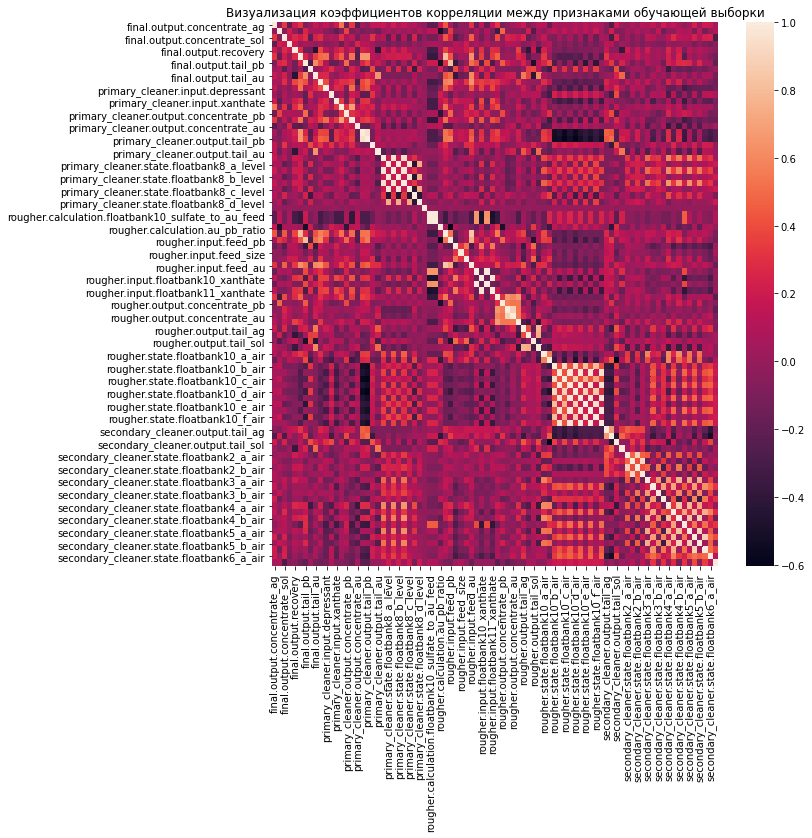

In [ ]:
corr = df_train.corr()
fig, ax = plt.subplots(figsize=(10, 10));
sns.heatmap(corr, ax=ax);
plt.title('Визуализация коэффициентов корреляции между признаками обучающей выборки');

### Вывод

При подготовке данных я удалила пропуски в таблицах, так как их значение было небольшим, выяснила какие признаки отсутствуют в тестовой выборке, проверила выборки на наличие дубликатов. Ярких сильных взаимосвязей между параметрами (=1.0) нет, исключение на промежуточных этапах такие связи просматриваются (primary_cleaner.state и routher.state). Это объяснимо, скорее всего есть формульные зависимости между признаками.

## Анализ данных

###  Как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки

In [ ]:
# первичная очистка

concetrates_primary=[]
concetrates_primary=pd.DataFrame(concetrates_primary)
concetrates_primary['primary_cleaner.output.concentrate_ag']=df_full['primary_cleaner.output.concentrate_ag']
concetrates_primary['primary_cleaner.output.concentrate_pb']=df_full['primary_cleaner.output.concentrate_pb']
concetrates_primary['primary_cleaner.output.concentrate_au']=df_full['primary_cleaner.output.concentrate_au']

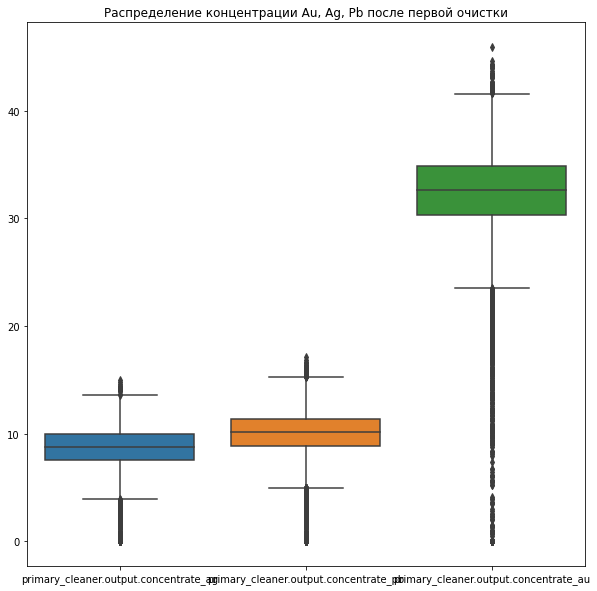

In [ ]:
# построим boxplot для наглядности

plt.figure(figsize=(10,10));
sns.boxplot(data=concetrates_primary);
plt.title('Распределение концентрации Au, Ag, Pb после первой очистки');

In [ ]:
# второй этап очистки

concetrates_final=[]
concetrates_final=pd.DataFrame(concetrates_final)
concetrates_final['final.output.concentrate_ag']=df_full['final.output.concentrate_ag']
concetrates_final['final.output.concentrate_pb']=df_full['final.output.concentrate_pb']
concetrates_final['final.output.concentrate_au']=df_full['final.output.concentrate_au']

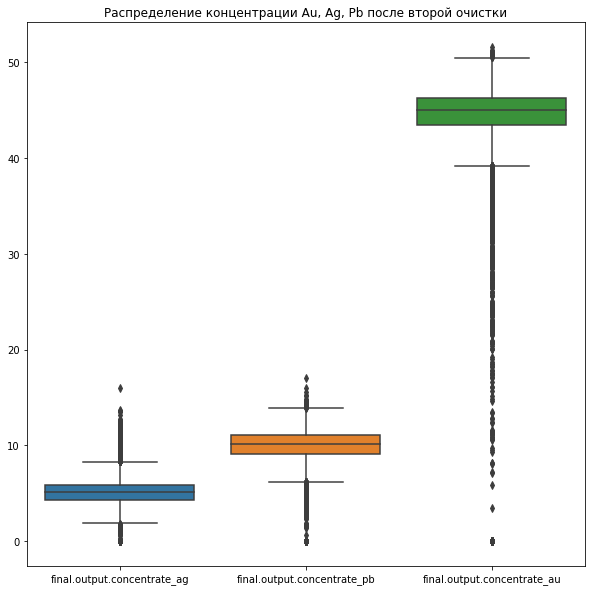

In [ ]:
plt.figure(figsize=(10,10));
sns.boxplot(data=concetrates_final);
plt.title('Распределение концентрации Au, Ag, Pb после второй очистки');

Для анализа я построила boxplot.

В распределениях концентраций Ag, Au и Pb есть выбросы. Для всех распределений характерно, что межквартильный размах на первом этапе очистки больше, чем на втором. То есть при первичной очистке больше вариативность концентраций, больше разнообразных значений и выбросов.

На втором этапе очистки вариативность уменьшилась (значения стали более "однородными", разброс снизился).

Причём концентрация золота в сырье выросла (от ~32 до 45%), свинца осталась примерно прежней (10%), а серебра уменьшилась.
Происходит обогащение руды, т.е. на каждом этапе концентрация золота в сырье (наш целевой признак) увеличивается.

### Распределения размеров гранул сырья на обучающей и тестовой выборках

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


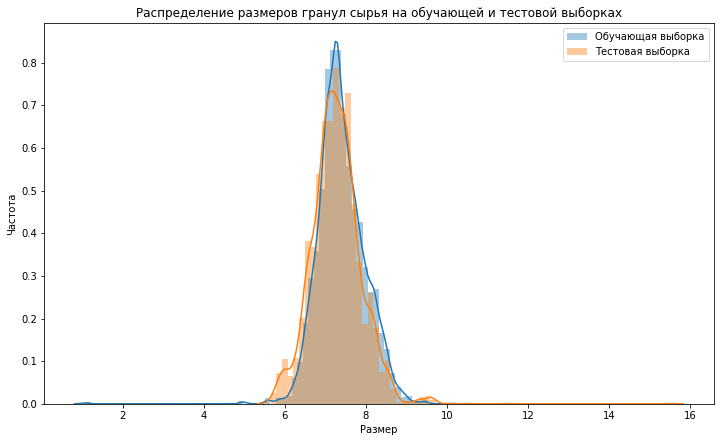

In [ ]:
# для сравнения построим график

plt.figure(figsize=(12, 7))
sns.distplot(df_train['primary_cleaner.input.feed_size'], bins=70, label='Обучающая выборка');
sns.distplot(df_test['primary_cleaner.input.feed_size'], bins=70, label='Тестовая выборка');
plt.title('Распределение размеров гранул сырья на обучающей и тестовой выборках');
plt.legend();
plt.xlabel('Размер');
plt.ylabel('Частота');

По графику видно, что распределения гранул сырья на обучающей и тестовой выборках совпадают. Это означает, что тестовая выборка является репрезентативной и пригодной для использования, оценка модели будет корректной.

### Исследую суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах

In [ ]:
# после флотации

df_full['sum_concentrate_rougher'] = df_full['rougher.output.concentrate_ag'] + df_full['rougher.output.concentrate_pb'] + df_full['rougher.output.concentrate_au']

In [ ]:
# после первой очистки

df_full['sum_concentrate_primary_cleaner'] = df_full['primary_cleaner.output.concentrate_ag'] + df_full['primary_cleaner.output.concentrate_pb'] + df_full['primary_cleaner.output.concentrate_au']

In [ ]:
# после второй очистки

df_full['sum_concentrate_final'] = df_full['final.output.concentrate_ag'] + df_full['final.output.concentrate_pb'] + df_full['final.output.concentrate_au']

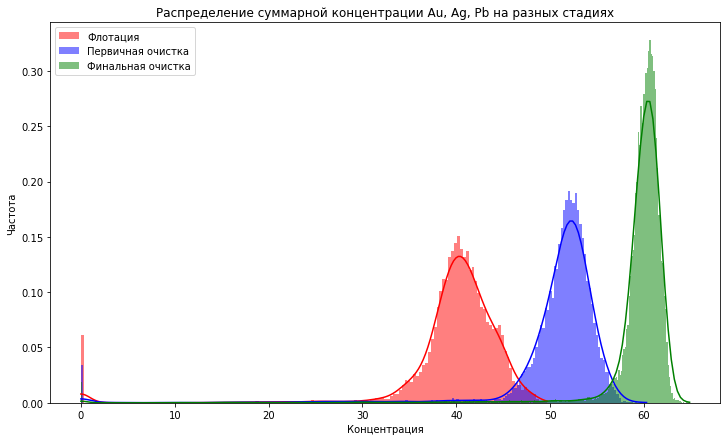

In [ ]:
# для сравнения концентраций построим график

plt.figure(figsize=(12, 7));
sns.histplot(df_full['sum_concentrate_rougher'], color="red", label='Флотация', kde=True, stat="density", linewidth=0);
sns.histplot(df_full['sum_concentrate_primary_cleaner'], color="blue", label='Первичная очистка', kde=True, stat="density", linewidth=0);
sns.histplot(df_full['sum_concentrate_final'], color="green", label='Финальная очистка', kde=True, stat="density", linewidth=0)
plt.title('Распределение суммарной концентрации Au, Ag, Pb на разных стадиях');
plt.legend();
plt.xlabel('Концентрация');
plt.ylabel('Частота');



1) Много выбросов (длинные хвосты распределения).

2) После каждой стадии процесса концентрация золота, серебра и свинца увеличивается.

In [ ]:
# посмотрим как обстоят дела на обучающей выборке

df_train['sum_concentrate_rougher'] = df_train['rougher.output.concentrate_ag'] + df_train['rougher.output.concentrate_pb'] + df_train['rougher.output.concentrate_au']
df_train['sum_concentrate_primary_cleaner'] = df_train['primary_cleaner.output.concentrate_ag'] + df_train['primary_cleaner.output.concentrate_pb'] + df_train['primary_cleaner.output.concentrate_au']
df_train['sum_concentrate_final'] = df_train['final.output.concentrate_ag'] + df_train['final.output.concentrate_pb'] + df_train['final.output.concentrate_au']

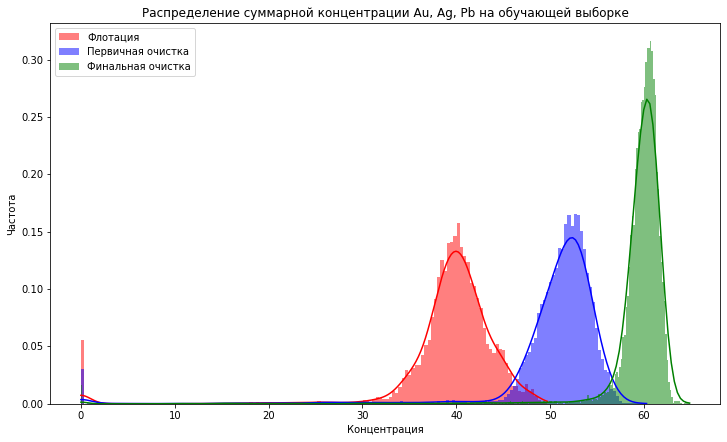

In [ ]:
plt.figure(figsize=(12, 7));
sns.histplot(df_train['sum_concentrate_rougher'], color="red", label='Флотация', kde=True, stat="density", linewidth=0);
sns.histplot(df_train['sum_concentrate_primary_cleaner'], color="blue", label='Первичная очистка', kde=True, stat="density", linewidth=0);
sns.histplot(df_train['sum_concentrate_final'], color="green", label='Финальная очистка', kde=True, stat="density", linewidth=0)
plt.title('Распределение суммарной концентрации Au, Ag, Pb на обучающей выборке');
plt.legend();
plt.xlabel('Концентрация');
plt.ylabel('Частота');

Здесь тоже есть выбросы. Так как на этой выборке мы будем обучать модель, "отрежем" концентрации меньше 30%.

In [ ]:
df_train = df_train[(df_train['sum_concentrate_rougher'] > 30) &
                  (df_train['sum_concentrate_primary_cleaner'] > 30) &
                  (df_train['sum_concentrate_final'] > 30)]

df_train = df_train.reset_index()

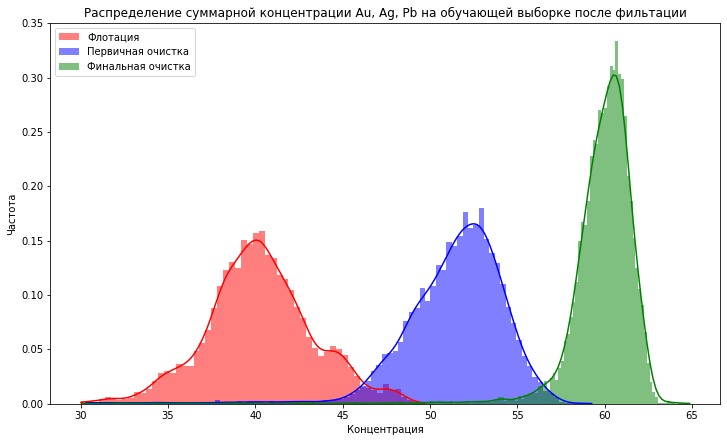

In [ ]:
plt.figure(figsize=(12, 7));
sns.histplot(df_train['sum_concentrate_rougher'], color="red", label='Флотация', stat="density", linewidth=0, kde=True);
sns.histplot(df_train['sum_concentrate_primary_cleaner'], color="blue", label='Первичная очистка', stat="density", linewidth=0, kde=True);
sns.histplot(df_train['sum_concentrate_final'], color="green", label='Финальная очистка', stat="density", linewidth=0, kde=True)
plt.title('Распределение суммарной концентрации Au, Ag, Pb на обучающей выборке после фильтации');
plt.legend();
plt.xlabel('Концентрация');
plt.ylabel('Частота');

### Вывод

Исследовала изменение суммарных концентраций золота, серебра и свинца на каждом этапе обогащения. После каждого этапа концетрации полезных элементов росли.

Выяснила, что распределения гранул сырья на обучающей и тестовой выборках совпадают. Тестовая выборка является репрезентативной.

Далее я решила отфильтровать обучающую выборку по суммарной концентрации элементов на каждом этапе ("отрезать" концентрации меньше 30%), т.е. убрать выбросы, чтобы модели обучались лучше.

## Модель

Для решения задачи введём новую метрику качества — sMAPE (англ. Symmetric Mean Absolute Percentage Error, «симметричное среднее абсолютное процентное отклонение»).

Она похожа на MAE, но выражается не в абсолютных величинах, а в относительных. Почему симметричная? Она одинаково учитывает масштаб и целевого признака, и предсказания.

Нужно спрогнозировать сразу две величины:

1) эффективность обогащения чернового концентрата rougher.output.recovery;

2) эффективность обогащения финального концентрата final.output.recovery.

In [ ]:
def total_smape(y_true,y_pred):
    numerator = np.abs(y_true - y_pred)
    denominator = (np.abs(y_true) + np.abs(y_pred))/2
    smape = ((numerator/denominator)*100).sum() / len(y_pred)
    return 0.25*smape[0] + 0.75*smape[1]

### Линейная регрессия

In [ ]:
columns = df_test.drop(['date'], axis=1).columns

train_features = df_train[columns]

column_target = ['rougher.output.recovery', 'final.output.recovery']

train_target  = df_train[column_target]

In [ ]:
df_test_full = df_test.merge(df_full).reset_index()

test_features = df_test_full[columns]

test_target_rougher = df_test_full['rougher.output.recovery']
test_target_final = df_test_full['final.output.recovery']

In [ ]:
clf_LR = linear_model.LinearRegression()

# для подсчёта sMAPE одного таргета
smape_scorer = make_scorer(total_smape, greater_is_better = False)

score = np.abs(cross_val_score(clf_LR, train_features, train_target, scoring=smape_scorer, cv=5).mean())

#score_final = np.abs(cross_val_score(clf_LR, train_features, train_target_final, scoring=smape_scorer, cv=5).mean())

# финальный sMAPE
#total_smape = 0.25*score_rougher + 0.75*score_final

print(f'sMAPE линейной регрессии: {score:.3}')

sMAPE линейной регрессии: 8.38


### Случайный лес

In [ ]:
clf_RF = ensemble.RandomForestRegressor()

In [ ]:
# параметры, которые важны

parameters = {'n_estimators': range(10, 20, 5),
             'max_depth': range(1, 10, 1)}

In [ ]:
smape_scorer = make_scorer(sMAPE, greater_is_better=False)

grid = GridSearchCV(clf_RF, parameters, scoring=smape_scorer, cv=5)
grid.fit(train_features, train_target_rougher)

grid.best_params_

{'max_depth': 3, 'n_estimators': 15}

In [ ]:
# посчитаем sMAPE для этапа rougher

clf_RF = ensemble.RandomForestRegressor(max_depth = 3, n_estimators = 15, random_state=12345)

score_rougher = np.abs(cross_val_score(clf_RF, train_features, train_target_rougher, scoring=smape_scorer, cv=5).mean())

In [ ]:
grid.fit(train_features, train_target_final)

grid.best_params_

{'max_depth': 1, 'n_estimators': 10}

In [ ]:
# посчитаем sMAPE для этапа final

clf_RF = ensemble.RandomForestRegressor(max_depth = 1, n_estimators = 10, random_state=12345)

score_final = np.abs(cross_val_score(clf_RF, train_features, train_target_final, scoring=smape_scorer, cv=5).mean())

In [ ]:
# итоговый sMAPE

total_smape = 0.25*score_rougher + 0.75*score_final

print(f'sMAPE случайного леса: {total_smape:.3}')

sMAPE случайного леса: 7.53


### Дерево решений

In [ ]:
clf_DT = tree.DecisionTreeRegressor(random_state=12345)

parameters = {'max_depth': range(1, 10, 1)}
             #'criterion': 'squared_error', 'friedman_mse', 'absolute_error'}

smape_scorer = make_scorer(sMAPE, greater_is_better=False)

# сетка
grid = GridSearchCV(clf_DT, parameters, scoring=smape_scorer, cv=5)

grid.fit(train_features, train_target_rougher)

grid.best_params_

{'max_depth': 3}

In [ ]:
# обучаю по best_parameters

clf_DT = tree.DecisionTreeRegressor(max_depth = 3, random_state=12345)

score_rougher = np.abs(cross_val_score(clf_RF, train_features, train_target_rougher, scoring=smape_scorer, cv=5).mean())

In [ ]:
# подбераю для финальной
grid.fit(train_features, train_target_final)

grid.best_params_

{'max_depth': 1}

In [ ]:
# обучаю по best_parameters

clf_DT = tree.DecisionTreeRegressor(max_depth = 1, random_state=12345)

score_final = np.abs(cross_val_score(clf_DT, train_features, train_target_final, scoring=smape_scorer, cv=5).mean())

In [ ]:
# итоговый sMAPE

total_smape = 0.25*score_rougher + 0.75*score_final

print(f'sMAPE случайного леса: {total_smape:.3}')

sMAPE случайного леса: 7.81


### Тестирую случайный лес

In [ ]:
scores = pd.DataFrame({'Линейная регрессия': [8.38],
                      'Случайный лес': [7.53],
                      'Дерево решений': [7.81]})

scores

,Линейная регрессия,Случайный лес,Дерево решений
0,8.38,7.53,7.81


По таблице видно, что наименьшая sMAPE у случайного леса, проверю его на тестовой

In [ ]:
clf_RF = ensemble.RandomForestRegressor(max_depth = 3, n_estimators = 15, random_state=12345)

score_rougher = np.abs(cross_val_score(clf_RF, test_features, test_target_rougher, scoring=smape_scorer, cv=5).mean())

clf_RF = ensemble.RandomForestRegressor(max_depth = 1, n_estimators = 10, random_state=12345)

score_final = np.abs(cross_val_score(clf_RF, test_features, test_target_final, scoring=smape_scorer, cv=5).mean())

total_smape = 0.25*score_rougher + 0.75*score_final

print(f'sMAPE случайного леса на тестовой: {total_smape:.3}')

sMAPE случайного леса на тестовой: 8.54


### Вывод



Для работы было предоставлено несколько источников данных: обучающая, тестовая и полная выборки. Нужно было обучить и настроить модель, которая могла бы предсказать коэффициент восстановления золота из золотосодержащей руды.
В процессе предобработки выяснилось, что не все признаки обучающей выборки актуальны для предсказания, так как в тестовой выборке часть признаков отсутствовала.
Я "очистила" все три датасета, удалила пропуски, так как это не сильно повредило объёму данных и проанализировала как менялась концентрация полезных элементов (золота, свинаца и серебра) после каждого этапа обогащения. Концентрация всегда росла, что свидетельствует о правильном простроении технологического процесса.
Затем, чтобы убедится, что тестовая выборка репрезентативна, я проверила совпадают ли размеры гранул сырья на обучающей и тестовой. Размер гранул совпал.
После я отфильтровала выборки от выбросов и приступила к обучению моделей.
Глючевой метрикой была sMAPE, поэтому наилучшую модель выбирала по ней (чем метрика меньше, тем модель лучше). В результате сравнения метрики я выбрала случайный лес, на втором месте дерево решений, а на третьем линейная регрессия.
При проверке на тестовой выборке случайный лес показал неплохой результат sMAPE=8.77.